In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 100)

In [ ]:
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 40 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-common all 2.24.32-1ubuntu1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-0 amd64 2.24.32-1ubuntu1 [1,769 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgail18 amd64 2.24.32-1ubuntu1 [14.2 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgail-common amd64 2.24.32

In [ ]:
df_diabetes = pd.read_csv('./efotraits_EFO_0001360-associations-2021-08-9.csv') 
df_diabetes.head()

,Variant and risk allele,P-value,P-value annotation,RAF,OR,Beta,CI,Mapped gene,Reported trait,Trait(s),Study accession,Location
0,rs9465871-<b>?</b>,6 x 10-8,NaN,NR,1.32,'-,'-,CDKAL1,Prevalent type 2 diabetes,type II diabetes mellitus,GCST004304,6:20717024
1,rs10761745-<b>?</b>,5 x 10-6,NaN,NR,1.2,'-,'-,JMJD1C,Type 2 diabetes,type II diabetes mellitus,GCST004305,10:63341311
2,rs163177-<b>C</b>,1 x 10-6,NaN,0.43,1.21,'-,'-,KCNQ1,Type 2 diabetes,type II diabetes mellitus,GCST004305,11:2817183
3,rs11131794-<b>?</b>,5 x 10-6,NaN,'-,'-,'-,'-,RN7SKP188,Type 2 diabetes,type II diabetes mellitus,GCST008827,4:167738950
4,rs7903146-<b>T</b>,3 x 10-11,NaN,0.38,1.66,'-,[1.50-1.81],TCF7L2,Type 2 diabetes,type II diabetes mellitus,GCST007221,10:112998590


In [ ]:
gene_names=list(df_diabetes["Mapped gene"])
print(len(gene_names))
print(gene_names)

4124
['CDKAL1', 'JMJD1C', 'KCNQ1', 'RN7SKP188', 'TCF7L2', 'PCSK6', 'TXNL4B', 'TXNL4B', 'TCF7L2', 'FTO', 'CDKN2B-AS1', 'IGF2BP2', "'-", 'HHEX, Y_RNA', 'RPSAP52', 'C5orf67, RPL26P19', 'SLC30A8', "'-", "'-", 'ARAP1', 'RN7SL198P, CDC123', 'TCF7L2', 'IGF2BP2', 'JAZF1', 'SLC30A8', 'CDKAL1', 'CDKN2B-AS1', 'HLA-DQB1, HLA-DQA1', 'PABPC4, PABPC4-AS1', 'NECTIN2', 'C5orf67', 'UBE2Z', "'-", "'-", "'-", "'-", 'SYN2', 'ARL15', 'ARL15', 'H4P1, KLF14', 'GLIS3', 'Y_RNA, EXOC6', 'RN7SL198P, CDC123', 'TCF7L2', "'-", 'TBC1D4', 'ITGA1', 'LARGE1, LINC01643', 'GABRB2', 'PON2', 'FREM2', "'-", 'PIEZO2', 'ZNF665', 'PPIAP17', 'CASP3P1, CHORDC1P5', 'LINC02794', 'Y_RNA, RNA5SP103', 'PCDH10, R3HDM2P1', 'MACROD2-AS1, MACROD2', 'PALLD', 'ISCA2', "'-", 'PXYLP1, ZBTB38', "'-", 'MLX', 'ANKH', 'ZC3H4', 'PDE4DIP', 'LINC02087, SPECC1P1', 'ALMS1P1', 'F5', 'RPS6KA2', 'FRG2LP, NF1P5', 'CCDC146', 'CCDC146', 'PAX4', 'CDKAL1', 'KCNQ1', 'MARCHF3', 'TCN2', 'KCNQ1', 'CDKN2B-AS1', 'HECTD4', 'GCK', 'HECTD4', 'OAS1', 'GCK', 'MTNR1B, SN

In [ ]:
df_diabetes["Mapped gene"].value_counts()

'-                  563
TCF7L2               72
SLC30A8              41
CDKN2B-AS1           40
IGF2BP2              39
                   ... 
UNC79                 1
STX8                  1
CNTN2                 1
CADM2, LINC02025      1
KRTCAP2P1, SIX3       1
Name: Mapped gene, Length: 1665, dtype: int64

In [ ]:
df_diabetes_top=df_diabetes.sort_values(by="P-value")
top_gene_names=list(df_diabetes_top["Mapped gene"][0:100])
print(top_gene_names)

['RNA5SP230, MYL7', 'CDKN2B-AS1', 'EGFEM1P', 'CNTN2', "'-", 'AOC1', 'SMARCC1', 'ST6GAL1', 'LINC02451', 'HECTD4', 'SRGAP2', 'ZNF236', 'RASGRP1', 'ARAP1', 'PNPLA3', 'CLN3', 'CYTH1', "'-", 'ATP1B2, SHBG', 'ZNRF3', 'LINC02537, VEGFA', 'PLEKHA1', 'IL2RA', 'OCIAD1, OCIAD2', 'EHHADH-AS1, C3orf70', 'TSC22D2, LINC01214', 'PKLR', 'NOTCH2', 'CRY2, SLC35C1', 'ZMIZ1', 'PLEKHM3', 'LRFN2', 'PLEKHA1', 'C5orf67, RPL26P19', 'KCNQ1', 'GMEB1, YTHDF2', 'USP44', 'TSC22D2, LINC01214', 'LRRC1, MLIP', 'LINC02725', 'RN7SL198P, CDC123', "'-", 'USP44', "'-", 'IGF2BP2', 'MIR3168, RN7SL597P', 'RBMS1', 'RPL31P12, NEGR1', 'SETD5', 'CDKAL1', 'UBE2E2', 'THADA', 'STK31', 'MIR4686, ASCL2', "'-", 'KCNQ1', 'BTD', 'C5orf67, RPL26P19', 'RNA5SP230, MYL7', 'ARAP1', "'-", 'RBMS1', 'LINC02245, LINC02576', 'HMG20A', 'CDKN2C, MIR4421', 'RN7SL383P, LINC02224', 'ARL15', "'-", 'MRPS35', 'IGF2BP3', 'CDKN2B-AS1', 'HNF1A-AS1, HNF1A', "'-", 'IFIH1', 'R3HDML, FITM2', 'HLA-DRB9', "'-", "'-", 'ATP5MGP5', 'HMG20A', 'TFAP2B', 'RBM6', 'SLC30A8

In [ ]:
df_diabetes_top["Mapped gene"][0:100].value_counts(ascending=False)

'-                      15
CDKN2B-AS1               2
PLEKHA1                  2
ARAP1                    2
USP44                    2
RBMS1                    2
TSC22D2, LINC01214       2
RNA5SP230, MYL7          2
C5orf67, RPL26P19        2
HMG20A                   2
KCNQ1                    2
LINC02451                1
RPL31P12, NEGR1          1
MRPS35                   1
SMARCC1                  1
ST6GAL1                  1
TCF7L2                   1
IFIH1                    1
RN7SL198P, CDC123        1
LINC02245, LINC02576     1
ZNF236                   1
IL2RA                    1
PLEKHM3                  1
EIF5A2, KLF7P1           1
RBM6                     1
PPARG                    1
HNF1A-AS1, HNF1A         1
ATP1B2, SHBG             1
TM6SF2                   1
GMEB1, YTHDF2            1
LINC01991                1
AOC1                     1
RASGRP1                  1
UBE2E2                   1
LINC01625, ATP5PBP6      1
LINC02537, VEGFA         1
LINC02725                1
C

In [ ]:
disease_gene = nx.from_pandas_edgelist(df_diabetes_top,source='Trait(s)',target='Mapped gene')
print(nx.info(disease_gene))

Name: 
Type: Graph
Number of nodes: 1714
Number of edges: 1791
Average degree:   2.0898


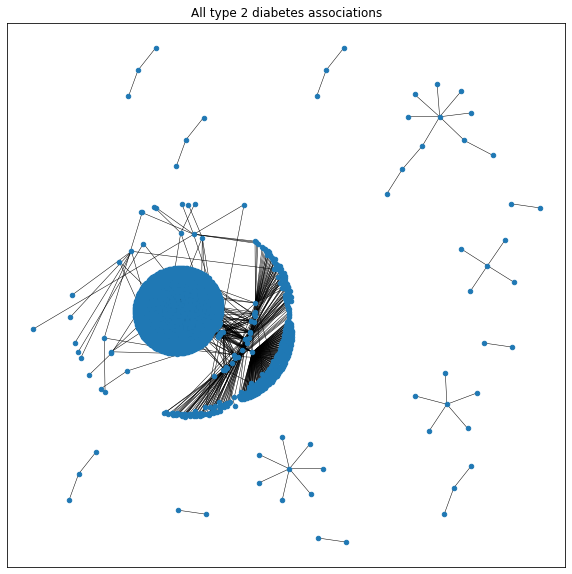

In [ ]:
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(disease_gene)
pos = nx.nx_agraph.graphviz_layout(disease_gene,prog='neato')
nx.draw_networkx_nodes(disease_gene, pos, label=None, node_size=20, cmap=plt.cm.jet)
nx.draw_networkx_edges(disease_gene, pos,width=0.5,arrows=False)
plt.title("All type 2 diabetes associations")
plt.show()

In [ ]:
trim_disease_gene = df_diabetes.head(50)
print(trim_disease_gene['Trait(s)'].unique())
trim_disease_gene.head()

['type II diabetes mellitus'
 'haptoglobin measurement, type II diabetes mellitus'
 'diabetic maculopathy, type II diabetes mellitus'
 'leptin measurement, type II diabetes mellitus'
 'Yu-Zhi constitution type, type II diabetes mellitus']


,Variant and risk allele,P-value,P-value annotation,RAF,OR,Beta,CI,Mapped gene,Reported trait,Trait(s),Study accession,Location
0,rs9465871-<b>?</b>,6 x 10-8,NaN,NR,1.32,'-,'-,CDKAL1,Prevalent type 2 diabetes,type II diabetes mellitus,GCST004304,6:20717024
1,rs10761745-<b>?</b>,5 x 10-6,NaN,NR,1.2,'-,'-,JMJD1C,Type 2 diabetes,type II diabetes mellitus,GCST004305,10:63341311
2,rs163177-<b>C</b>,1 x 10-6,NaN,0.43,1.21,'-,'-,KCNQ1,Type 2 diabetes,type II diabetes mellitus,GCST004305,11:2817183
3,rs11131794-<b>?</b>,5 x 10-6,NaN,'-,'-,'-,'-,RN7SKP188,Type 2 diabetes,type II diabetes mellitus,GCST008827,4:167738950
4,rs7903146-<b>T</b>,3 x 10-11,NaN,0.38,1.66,'-,[1.50-1.81],TCF7L2,Type 2 diabetes,type II diabetes mellitus,GCST007221,10:112998590


In [ ]:
network_disease_gene = nx.from_pandas_edgelist(trim_disease_gene,source='Trait(s)',target='Mapped gene')
print(nx.info(network_disease_gene))

Name: 
Type: Graph
Number of nodes: 38
Number of edges: 37
Average degree:   1.9474


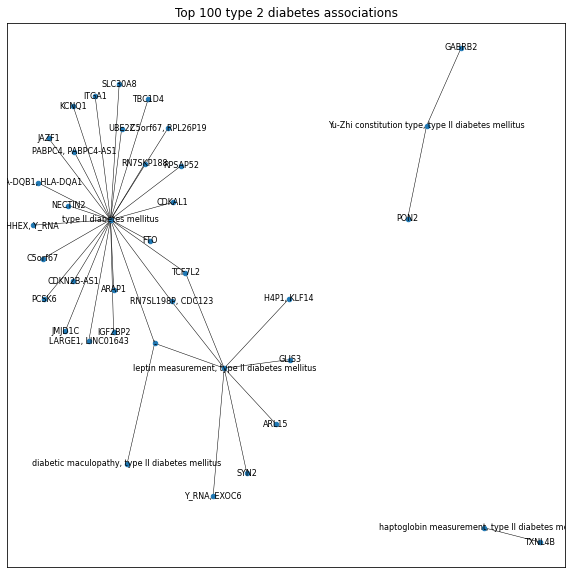

In [ ]:
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(network_disease_gene)
pos = nx.nx_agraph.graphviz_layout(network_disease_gene,prog='neato')
nx.draw_networkx_nodes(network_disease_gene, pos,  label=None, node_size=20, cmap=plt.cm.jet)
nx.draw_networkx_edges(network_disease_gene, pos,width=0.5,arrows=False)
# #Uncomment to label by node number
nx.draw_networkx_labels(network_disease_gene,pos=pos, font_size=8, alpha=1)
plt.title("Top 100 type 2 diabetes associations")
plt.show()